

####  Chuẩn bị thiết kế sơ đồ sản xuất JOBSHOP mới để mở rộng công ty với một vài đặc điểm như :
#### •	Nhà máy mới có kích thước 25m x 16m.
#### •	Có 36 máy trạm là các máy khác nhau có yêu cầu không gian riêng biệt (Bảng "Máy", Kích thước được cung cấp tính bằng cm).
#### •	Dữ liệu lịch sử các mặt hàng do công ty sản xuất được trình bày chi tiết trong bảng "Đơn hàng".
#### •	Việc tìm ra cách bố trí tốt nhất có thể giúp giảm thiểu tổng khoảng cách di chuyển bên trong nhà máy. Các vị trí làm việc phải cách nhau ít nhất 1m để đảm bảo an toàn


In [1]:
import pandas as pd
orders = pd.read_excel('Layout Group project.xlsx', sheet_name = "Order")
machines = pd.read_excel('Layout Group project.xlsx',sheet_name = "Machines")
print(machines.head())
print(orders.head())

  Machine  Wid  Len  Width  Length      X_old      Y_old  Unnamed: 7
0     MAL   84  223     80     220  2052.4741   906.6512         0.0
1     GCN  119  133    120     130  1137.0185  1091.5546         NaN
2      SH  104  110    100     110  2279.7939   769.5989         NaN
3      LA   82  254     80     250  1315.9362  1346.7698         NaN
4     GRS   33  126     30     130   216.5970  1228.5397         NaN
   Order     ItemCode  Quantity   P1  P2   P3     P4     P5   P6   P7   P8
0      1    C04046002       450  MAL  SH   MC    NaN    NaN  NaN  NaN  NaN
1      2    C04046003       450  MAL  SH   MC    NaN    NaN  NaN  NaN  NaN
2      3    C05063001       450  MAL  LA   MC    LA2    NaN  NaN  NaN  NaN
3      4  C1709057027       264   SH  MC  EDM  O-EWC    NaN  NaN  NaN  NaN
4      5  C1709057028        68   SH  MC  GRS     MC  O-EWC  NaN  NaN  NaN


In [2]:
relation = []
for i in range(orders.shape[0]):
  x = list(str(orders.loc[i,'P'+str(j)]) for j in range(1,9))
  x_ = list(filter(lambda a: a != 'nan', x))
  for k in range(len(x_)-1):
    if (x_[k],x_[k+1]) not in relation:
      relation.append((x_[k],x_[k+1]))
print(relation)

[('MAL', 'SH'), ('SH', 'MC'), ('MAL', 'LA'), ('LA', 'MC'), ('MC', 'LA2'), ('MC', 'EDM'), ('EDM', 'O-EWC'), ('MC', 'GRS'), ('GRS', 'MC'), ('MC', 'O-EWC'), ('SH', 'MI'), ('MI', 'To'), ('To', 'GRS'), ('GRS', 'EWC'), ('DC', 'SH'), ('MC', 'HNT'), ('SH', 'GRS'), ('MC', 'NI HOA'), ('GRS', 'MC2'), ('MC2', 'EWC'), ('MC', 'EWC'), ('EWC', 'NI HOA'), ('MI', 'NI HOA'), ('MI', 'SA W'), ('MI', 'EWC'), ('EWC', 'SAW'), ('LA', 'MI'), ('MC', 'To'), ('To', 'LA'), ('LA', 'GRO'), ('GRO', 'GRS'), ('MI', 'MC'), ('To', 'GRI'), ('GRI', 'GRO'), ('To', 'EWC'), ('MI', 'H CR'), ('LA', 'H CR'), ('EDM', 'EWC'), ('EWC', 'SOB'), ('MI', 'NI'), ('MI', 'WELD'), ('WELD', 'MI'), ('MI', 'SOB'), ('MC', 'LA'), ('MC', 'SA W'), ('MI', 'EDM'), ('O_LA', 'MI'), ('LA', 'GRS'), ('GRS', 'MAK'), ('O_LA', 'To'), ('EWC', 'MAK'), ('LA', 'O-EWC'), ('O-EWC', 'MI'), ('O_LA', 'MC'), ('SH', 'EWC'), ('EWC', 'MC'), ('EWC', 'GRS'), ('MC', 'T'), ('T', 'GRS'), ('MI', 'SA B'), ('To', 'NGUOI'), ('NGUOI', 'NI HOA'), ('MC', 'SAW'), ('SAW', 'MC2'), ('O_

In [4]:
def tansuat(X):
  A_B = 0
  for i in range(orders.shape[0]):
    for j in range(1,8):
      if str(orders.loc[i,"P"+str(j)]) == 'nan' or str(orders.loc[i,"P"+str(j+1)]) == 'nan':
        continue
      if (orders.loc[i,"P"+str(j)], orders.loc[i,"P"+str(j+1)]) == X or (orders.loc[i,"P"+str(j+1)], orders.loc[i,"P"+str(j)]) == X:
        A_B += orders.loc[i,'Quantity']
        break
  return(A_B)
freq = {}
for i in relation:
  freq[i] = tansuat(i)
print(freq)

{('MAL', 'SH'): 914, ('SH', 'MC'): 18680, ('MAL', 'LA'): 460, ('LA', 'MC'): 475, ('MC', 'LA2'): 450, ('MC', 'EDM'): 324, ('EDM', 'O-EWC'): 264, ('MC', 'GRS'): 327, ('GRS', 'MC'): 327, ('MC', 'O-EWC'): 80, ('SH', 'MI'): 1698, ('MI', 'To'): 328, ('To', 'GRS'): 159, ('GRS', 'EWC'): 432, ('DC', 'SH'): 47, ('MC', 'HNT'): 45, ('SH', 'GRS'): 83, ('MC', 'NI HOA'): 51, ('GRS', 'MC2'): 2, ('MC2', 'EWC'): 2, ('MC', 'EWC'): 102, ('EWC', 'NI HOA'): 21, ('MI', 'NI HOA'): 46, ('MI', 'SA W'): 591, ('MI', 'EWC'): 26, ('EWC', 'SAW'): 2, ('LA', 'MI'): 333, ('MC', 'To'): 26, ('To', 'LA'): 164, ('LA', 'GRO'): 18, ('GRO', 'GRS'): 29, ('MI', 'MC'): 559, ('To', 'GRI'): 23, ('GRI', 'GRO'): 23, ('To', 'EWC'): 8, ('MI', 'H CR'): 4, ('LA', 'H CR'): 2, ('EDM', 'EWC'): 65, ('EWC', 'SOB'): 98, ('MI', 'NI'): 4, ('MI', 'WELD'): 230, ('WELD', 'MI'): 230, ('MI', 'SOB'): 499, ('MC', 'LA'): 475, ('MC', 'SA W'): 426, ('MI', 'EDM'): 5, ('O_LA', 'MI'): 76, ('LA', 'GRS'): 199, ('GRS', 'MAK'): 142, ('O_LA', 'To'): 22, ('EWC', 

In [5]:
key_list = list(freq.keys())
mchpair = len(key_list)
print('Pair of machines : ', mchpair)

Pair of machines :  103


In [6]:
v=list()
for i in range(len(relation)-1):
  v.append(tansuat(relation[i]))
sx = sorted(v)
print(sx)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 4, 4, 4, 5, 6, 6, 7, 8, 8, 8, 8, 9, 9, 10, 11, 11, 12, 12, 13, 15, 16, 18, 18, 21, 22, 23, 23, 26, 26, 26, 29, 34, 34, 37, 42, 42, 45, 46, 47, 51, 65, 72, 72, 76, 80, 82, 83, 90, 98, 102, 102, 142, 159, 164, 164, 199, 230, 230, 264, 270, 270, 324, 327, 327, 328, 333, 333, 375, 375, 426, 432, 432, 450, 460, 475, 475, 480, 480, 499, 559, 559, 591, 914, 1698, 18680]


In [5]:
mch = list(machines['Machine'])
print(mch)

['MAL', 'GCN', 'SH', 'LA', 'GRS', 'EWC', 'MI', 'DC', 'MC', 'O_LA', 'O_MC', 'O_MI', 'To', 'O-MC', 'T', 'LA2', 'EDM', 'H CR', 'WELD', 'O-EWC', 'GRI', 'GRO', 'SOB', 'NI HOA', 'SA W', 'NI', 'SA B', 'NGUOI', 'SAW', 'SEH-CR', 'BCAT', 'HNT', 'MC2', 'MAK', 'SAB', 'EDMO']


In [6]:
flow = pd.DataFrame(0, index = mch, columns = mch, dtype = int)
for i in key_list:
  flow.loc[i[0],i[1]], flow.loc[i[1],i[0]] = int(freq[i]), int(freq[i])
flow

,MAL,GCN,SH,LA,GRS,EWC,MI,DC,MC,O_LA,...,SA B,NGUOI,SAW,SEH-CR,BCAT,HNT,MC2,MAK,SAB,EDMO
MAL,0,0,914,460,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SH,914,0,0,0,83,2,1698,47,18680,0,...,0,0,0,0,0,0,0,0,0,0
LA,460,0,0,0,199,42,333,0,475,0,...,0,0,0,0,72,0,0,0,0,0
GRS,0,0,83,199,0,432,11,0,327,0,...,0,4,0,3,0,0,2,142,0,2
EWC,0,0,2,42,432,0,26,0,102,0,...,0,0,2,0,0,0,2,15,0,0
MI,0,0,1698,333,11,26,0,0,559,76,...,37,0,7,16,0,0,0,0,90,0
DC,0,0,47,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MC,0,0,18680,475,327,102,559,0,0,2,...,6,0,480,0,0,45,0,0,0,0
O_LA,0,0,0,0,0,0,76,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
table_tansuat = flow.copy()
duplicate = []
row = list(flow.index.values.tolist())
for i in range(len(row)):
  duplicate.append((row[i],row[i]))
print(duplicate)

[('MAL', 'MAL'), ('GCN', 'GCN'), ('SH', 'SH'), ('LA', 'LA'), ('GRS', 'GRS'), ('EWC', 'EWC'), ('MI', 'MI'), ('DC', 'DC'), ('MC', 'MC'), ('O_LA', 'O_LA'), ('O_MC', 'O_MC'), ('O_MI', 'O_MI'), ('To', 'To'), ('O-MC', 'O-MC'), ('T', 'T'), ('LA2', 'LA2'), ('EDM', 'EDM'), ('H CR', 'H CR'), ('WELD', 'WELD'), ('O-EWC', 'O-EWC'), ('GRI', 'GRI'), ('GRO', 'GRO'), ('SOB', 'SOB'), ('NI HOA', 'NI HOA'), ('SA W', 'SA W'), ('NI', 'NI'), ('SA B', 'SA B'), ('NGUOI', 'NGUOI'), ('SAW', 'SAW'), ('SEH-CR', 'SEH-CR'), ('BCAT', 'BCAT'), ('HNT', 'HNT'), ('MC2', 'MC2'), ('MAK', 'MAK'), ('SAB', 'SAB'), ('EDMO', 'EDMO')]


In [8]:
f = [freq[key] for key in freq]
f.sort()

level_1 = f[int(len(f) * 0.5)]
level_2 = f[int(len(f) * 0.7)]
level_3 = f[int(len(f) * 0.85)]
level_4 = f[int(len(f) * 0.95)]

for row in flow.index:
    for col in flow.columns:
        if pd.notna(flow.loc[row, col]):
            if flow.loc[row, col] >= level_4:
                flow.loc[row, col] = 'A'
            elif flow.loc[row, col] >= level_3:
                flow.loc[row, col] = 'E'
            elif flow.loc[row, col] >= level_2:
                flow.loc[row, col] = 'I'
            elif flow.loc[row, col] >= level_1:
                flow.loc[row, col] = 'O'
            elif flow.loc[row, col] > 0:
                flow.loc[row, col] = 'U'
            else:
                flow.loc[row, col] = '-'
flow

C:\Users\DUC QUAN\AppData\Local\Temp\ipykernel_9204\4188641428.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  flow.loc[row, col] = '-'
C:\Users\DUC QUAN\AppData\Local\Temp\ipykernel_9204\4188641428.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  flow.loc[row, col] = '-'
C:\Users\DUC QUAN\AppData\Local\Temp\ipykernel_9204\4188641428.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  flow.loc[row, col] = 'A'
C:\Users\DUC QUAN\AppData\Local\Temp\ipykernel_9204\

,MAL,GCN,SH,LA,GRS,EWC,MI,DC,MC,O_LA,...,SA B,NGUOI,SAW,SEH-CR,BCAT,HNT,MC2,MAK,SAB,EDMO
MAL,-,-,A,E,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
GCN,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
SH,A,-,-,-,O,U,A,O,A,-,...,-,-,-,-,-,-,-,-,-,-
LA,E,-,-,-,I,O,I,-,E,-,...,-,-,-,-,O,-,-,-,-,-
GRS,-,-,O,I,-,E,U,-,I,-,...,-,U,-,U,-,-,U,O,-,U
EWC,-,-,U,O,E,-,U,-,O,-,...,-,-,U,-,-,-,U,U,-,-
MI,-,-,A,I,U,U,-,-,A,O,...,U,-,U,U,-,-,-,-,O,-
DC,-,-,O,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
MC,-,-,A,E,I,O,A,-,-,U,...,U,-,E,-,-,O,-,-,-,-
O_LA,-,-,-,-,-,-,O,-,U,-,...,-,-,-,-,-,-,-,-,-,-


In [9]:
import random

listscore = []
max_positions = []
listmay = []
while len(max_positions) < 20:
  frq_matrixcop = flow
  mchlist = []
  machine = random.choice(mch)
  mchlist.append(machine)

  for i in range(len(mch)-1):
    machine_ = machine
    selected_mch = frq_matrixcop.loc[frq_matrixcop[machine] == 'A',[machine]]
    machinelist = selected_mch.index.tolist()
    if len(machinelist)>0:
      machine = random.choice(machinelist)
    else:
      selected_mch = frq_matrixcop.loc[frq_matrixcop[machine] == 'E',[machine]]
      machinelist = selected_mch.index.tolist()
      if len(machinelist)>0:
        machine = random.choice(machinelist)
      else:
        selected_mch = frq_matrixcop.loc[frq_matrixcop[machine] == 'I',[machine]]
        machinelist = selected_mch.index.tolist()
        if len(machinelist)>0:
          machine = random.choice(machinelist)
        else:
          selected_mch = frq_matrixcop.loc[frq_matrixcop[machine] == 'O',[machine]]
          machinelist = selected_mch.index.tolist()
          if len(machinelist)>0:
            machine = random.choice(machinelist)
          else:
            selected_mch = frq_matrixcop.loc[frq_matrixcop[machine] == 'U',[machine]]
            machinelist = selected_mch.index.tolist()
            if len(machinelist)>0:
              machine = random.choice(machinelist)
            else:
              selected_mch = frq_matrixcop.loc[frq_matrixcop[machine] == '-',[machine]]
              machinelist = [index_value for index_value in selected_mch.index.tolist() if index_value != machine]
              machine = random.choice(machinelist)
    frq_matrixcop = frq_matrixcop.drop(columns=[machine_])
    frq_matrixcop = frq_matrixcop.drop(index=[machine_])
    mchlist.append(machine)
  listmay.append(mchlist)

  Relationship_score = 0
  for i in range(len(mchlist)-1):
    relationship = flow.loc[mchlist[i],mchlist[i+1]]
    if relationship == 'A':
      Relationship_score = Relationship_score + 64
    elif relationship == 'E':
      Relationship_score = Relationship_score + 16
    elif relationship == 'I':
      Relationship_score = Relationship_score + 4
    elif relationship == 'O':
      Relationship_score = Relationship_score + 1
  listscore.append(Relationship_score)
  max_value = max(listscore)
  max_positions = [i for i, value in enumerate(listscore) if value == max_value]
print("Danh sách điểm mối quan hệ:", listscore)
print("Điểm mqh cao nhất:", max_value)
print("Vị trí của điểm quan hệ :", max_positions)

Danh sách điểm mối quan hệ: [250, 262, 254, 270, 274, 258, 273, 253, 317, 305, 257, 274, 277, 255, 305, 277, 274, 261, 254, 222, 254, 270, 318, 273, 269, 261, 253, 257, 278, 254, 282, 302, 254, 273, 321, 204, 259, 277, 275, 273, 219, 253, 255, 257, 261, 210, 253, 254, 257, 254, 276, 285, 254, 218, 254, 261, 273, 254, 261, 250, 222, 277, 258, 277, 202, 218, 206, 251, 257, 286, 258, 208, 259, 274, 251, 251, 277, 246, 258, 255, 258, 289, 277, 318, 274, 258, 257, 221, 274, 259, 257, 274, 261, 276, 267, 318, 254, 276, 306, 274, 205, 222, 253, 257, 254, 277, 274, 262, 253, 201, 269, 257, 255, 259, 222, 257, 207, 257, 223, 205, 251, 255, 250, 224, 259, 258, 273, 255, 285, 247, 277, 289, 276, 305, 254, 277, 257, 259, 209, 270, 206, 261, 257, 207, 273, 217, 258, 257, 258, 274, 253, 255, 250, 206, 317, 321, 275, 257, 250, 210, 274, 282, 248, 258, 250, 267, 317, 275, 282, 273, 257, 261, 258, 274, 260, 275, 260, 274, 258, 254, 258, 205, 205, 262, 285, 321, 206, 317, 257, 254, 275, 317, 273, 250, 2

In [10]:
import pandas as pd
import numpy as np
import math

mchn = machines
mintotaldistance = math.inf
dflist = []

for j in range(len(max_positions)):
  print('List',j + 1,':')
  print(listmay[max_positions[j]])
  dsmay = listmay[max_positions[j]]
  mchncoordinates = []

  now_col = 0
  x = 0
  y = 0
  length = 0
  maxwid = 0
  i = 0
  distance = 150 #Can be changed

  while i < 36:
      if now_col %2 == 0:
        wid = mchn[mchn['Machine'] == dsmay[i]]['Wid'].values[0]
        length = mchn[mchn['Machine'] == dsmay[i]]['Length'].values[0]
        if wid > maxwid: maxwid = wid
        coordinates = (dsmay[i], [x + wid/2, y + length/2])
        mchncoordinates.append(coordinates)
        y = y + length + distance
        i = i + 1
        if i == 36: break
        if y + mchn[mchn['Machine'] == dsmay[i]]['Length'].values[0] > 1600:
          now_col = now_col + 1
          x = x + maxwid + distance
          maxwid = 0
          y = 1600 + distance

      if now_col % 2 == 1:
        wid = mchn[mchn['Machine'] == dsmay[i]]['Wid'].values[0]
        length = mchn[mchn['Machine'] == dsmay[i]]['Length'].values[0]
        if wid > maxwid: maxwid = wid
        y = y - length - distance
        coordinates = (dsmay[i], [x + wid/2, y + length/2])
        mchncoordinates.append(coordinates)
        i = i + 1
        if i == 36: break
        if y - mchn[mchn['Machine'] == dsmay[i]]['Length'].values[0] - distance < 0:
          now_col = now_col + 1
          x = x + maxwid + distance
          maxwid = 0
          y = 0

  df = pd.DataFrame(mchncoordinates, columns=['Name', 'Coordinates'])
  dflist.append(df)

  def distance(a, b):
    return np.sum(np.abs(a - b))
  totaldistance = 0
  for i in range(mchpair):
      mch1 = df[key_list[i][0]==df['Name']]['Coordinates'].values[0]
      mch2 = df[key_list[i][1]==df['Name']]['Coordinates'].values[0]
      frequency = freq[(key_list[i][0],key_list[i][1])]
      totaldistance = totaldistance + distance(np.array(mch1),np.array(mch2))*frequency
  print('Total distance:',totaldistance,'cm')
  if totaldistance < mintotaldistance:
    mintotaldistance = totaldistance
    stt = j
optimallist = listmay[max_positions[stt]]
print('----------------------')
print('Danh sách máy cho tổng khoảng cách tối thiểu:\n',optimallist)
print('Tổng khoảng cách di chuyển tối thiểu trong nhà máy:',mintotaldistance,'cm')
print('Tọa độ của danh sách Máy cho tổng khoảng cách tối thiểu:\n', dflist[stt])

List 1 :
['MAK', 'GRS', 'EWC', 'GRO', 'EDM', 'O-EWC', 'LA', 'MAL', 'SH', 'MC', 'MI', 'SA W', 'NI', 'MC2', 'SAW', 'DC', 'BCAT', 'To', 'O_MI', 'O_LA', 'O_MC', 'H CR', 'SEH-CR', 'NGUOI', 'NI HOA', 'EDMO', 'HNT', 'SOB', 'LA2', 'O-MC', 'T', 'GCN', 'WELD', 'GRI', 'SAB', 'SA B']
Total distance: 17129591.5 cm
List 2 :
['T', 'EDM', 'O-EWC', 'LA', 'MAL', 'SH', 'MC', 'MI', 'SA W', 'SOB', 'GRS', 'EWC', 'GRO', 'To', 'BCAT', 'SEH-CR', 'O_MI', 'O_LA', 'O_MC', 'O-MC', 'GRI', 'NI', 'NGUOI', 'NI HOA', 'EDMO', 'GCN', 'DC', 'HNT', 'H CR', 'SAB', 'SA B', 'LA2', 'WELD', 'MC2', 'SAW', 'MAK']
Total distance: 17187815.5 cm
List 3 :
['MAK', 'GRS', 'EWC', 'GRO', 'EDM', 'O-EWC', 'LA', 'MAL', 'SH', 'MC', 'MI', 'SA W', 'To', 'BCAT', 'O_MI', 'O_LA', 'O_MC', 'HNT', 'O-MC', 'GRI', 'SEH-CR', 'DC', 'WELD', 'NGUOI', 'NI HOA', 'EDMO', 'SAB', 'SOB', 'MC2', 'SAW', 'LA2', 'T', 'SA B', 'H CR', 'NI', 'GCN']
Total distance: 16844535.5 cm
List 4 :
['SA W', 'MI', 'MC', 'SH', 'MAL', 'LA', 'O-EWC', 'EDM', 'GRO', 'EWC', 'GRS', 'SOB'

In [11]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.font_manager as fm
font_family = 'arial'
font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')[0]

mchn = machines

new_image = Image.new('RGB', (2500, 1600), color='white')
draw = ImageDraw.Draw(new_image)
font = ImageFont.truetype(font_path, 64)

now_col = 0
x = 0
y = 0
length = 0
maxwid = 0
i = 0
distance = 150 #Can be changed

while i < 36:
    if now_col %2 == 0:
      wid = mchn[mchn['Machine'] == optimallist[i]]['Wid'].values[0]
      length = mchn[mchn['Machine'] == optimallist[i]]['Length'].values[0]
      if wid > maxwid: maxwid = wid
      red_image = Image.new('RGB', (wid, length), color='blue')
      new_image.paste(red_image, (x, y))
      coordinates = (optimallist[i], [x + wid/2, y + length/2])
      draw.text((x, y), optimallist[i], fill="orange", font=font)
      y = y + length + distance
      i = i + 1
      if i == 36: break
      if y + mchn[mchn['Machine'] == optimallist[i]]['Length'].values[0] > 1600:
        now_col = now_col + 1
        x = x + maxwid + distance
        maxwid = 0
        y = 1600 + distance

    if now_col % 2 == 1:
      wid = mchn[mchn['Machine'] == optimallist[i]]['Wid'].values[0]
      length = mchn[mchn['Machine'] == optimallist[i]]['Length'].values[0]
      if wid > maxwid: maxwid = wid
      red_image = Image.new('RGB', (wid, length), color='blue')
      y = y - length - distance
      new_image.paste(red_image, (x, y))
      coordinates = (optimallist[i], [x + wid/2, y + length/2])
      draw.text((x, y), (optimallist[i]), fill="orange", font=font)
      i = i + 1
      if i == 36: break
      if y - mchn[mchn['Machine'] == optimallist[i]]['Length'].values[0] - distance < 0:
        now_col = now_col + 1
        x = x + maxwid + distance
        maxwid = 0
        y = 0

new_image.save('layout.png')


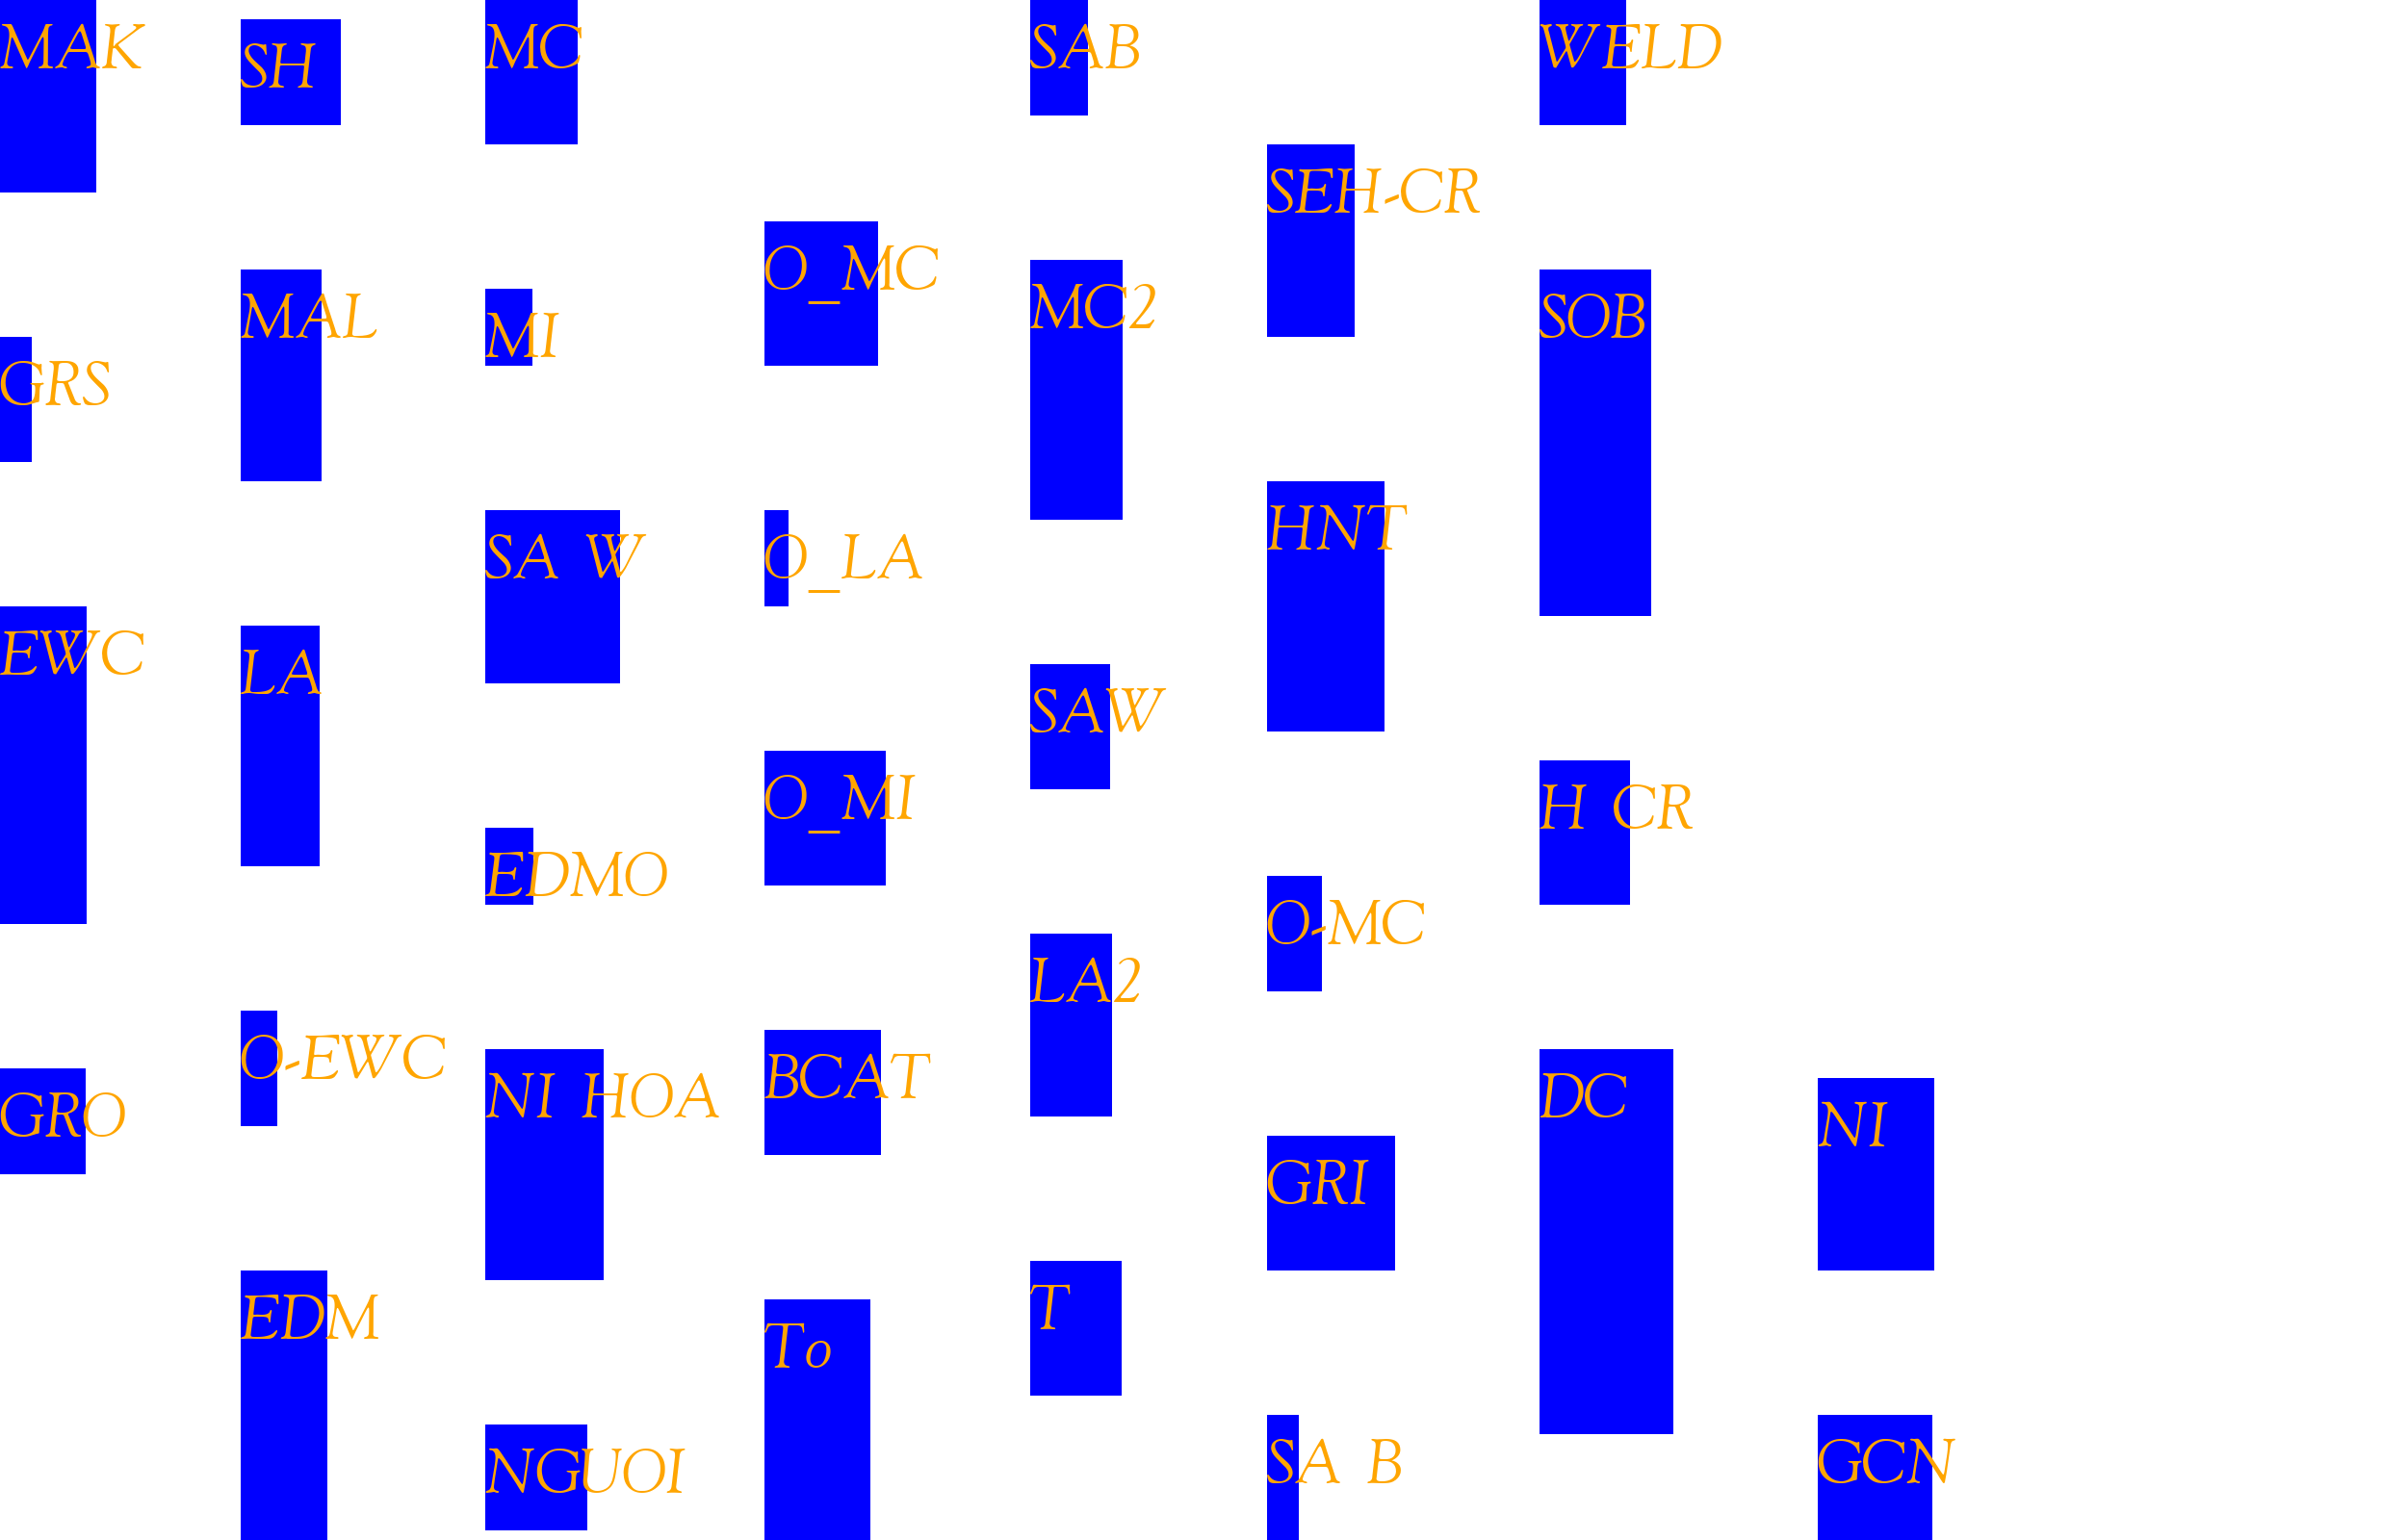

In [12]:
axis = pd.read_excel('Layout Group project.xlsx',sheet_name = "Toadocu")
machine = []
x = []
y = []
i = 0
for a in axis.get('Machine'):
  if i < 36:
    machine.append(a)
    i+=1
i = 0
for b in axis.get('X_old'):
  if i < 36:
    x.append(b)
    i+=1
i = 0
for c in axis.get('Y_old'):
  if i < 36:
    y.append(c)
    i+=1
result = []
temp = []
for i in range(0, len(x)):
  for j in np.delete(list(range(0, len(x))),i,0): 
    temp.append(abs(x[j] - x[i]) + abs(y[j] - y[i]))
  result.append(temp)
  temp = []
arr = np.array(result)
m = table_tansuat.to_numpy()
result = 0
for i in range(0, len(arr)-1):
  for j in range(0, len(arr)-1):
    result += arr[i][j] * m[i][j]
print("Tổng khoảng cách của mặt bằng ban đầu là: ",result, "cm")


Tổng khoảng cách của mặt bằng ban đầu là:  78575325.50000004 cm


Vậy ta kết luận như sau : 
Tổng khoảng cách di chuyển tối thiểu trong nhà máy::  78575325.50000004 cm

Tổng khoảng cách di chuyển tối thiểu trong nhà máy sau khi cải tiến là: 16785932.5 cm.

Suy ra tổng khoảng cách đã giảm đi đáng kể ( 78,65% ) so với ban đầu


#### Chọn ra 20 máy có số lượng cao nhất rồi gấp đôi chúng , ta cần phải mua thêm bao nhiêu máy để cực tiểu quãng đường di chuyển

In [2]:
# Load dữ liệu từ file
file_path = 'Layout Group project.xlsx'
order_df = pd.read_excel(file_path, sheet_name='Order')

In [3]:
top_20_products = order_df.nlargest(20, 'Quantity').copy()  # Lấy 20 sản phẩm có quantity cao nhất
top_20_products['Quantity'] *= 2  # Gấp đôi số lượng
top_20_products.head()

,Order,ItemCode,Quantity,P1,P2,P3,P4,P5,P6,P7,P8
98,99,C02012002,9000,SH,MC,NaN,NaN,NaN,NaN,NaN,NaN
302,303,C03024002,6000,SH,MC,NaN,NaN,NaN,NaN,NaN,NaN
327,328,C02081001,6000,SH,MC,NaN,NaN,NaN,NaN,NaN,NaN
144,145,C04046004,2100,SH,MC,NaN,NaN,NaN,NaN,NaN,NaN
141,142,C02012005,1800,SH,MC,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
machine_columns = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']
# Tạo danh sách các máy trong mỗi sản phẩm
top_20_products['machines_list'] = top_20_products[machine_columns].apply(lambda row: [machine for machine in row if pd.notna(machine)], axis=1)
# In danh sách các máy cho từng sản phẩm
for index, row in top_20_products.iterrows():
    print(f"Order {row['Order']} có các máy: {row['machines_list']}")

Order 99 có các máy: ['SH', 'MC']
Order 303 có các máy: ['SH', 'MC']
Order 328 có các máy: ['SH', 'MC']
Order 145 có các máy: ['SH', 'MC']
Order 142 có các máy: ['SH', 'MC']
Order 302 có các máy: ['SH', 'MC']
Order 240 có các máy: ['SH', 'MC']
Order 1 có các máy: ['MAL', 'SH', 'MC']
Order 2 có các máy: ['MAL', 'SH', 'MC']
Order 3 có các máy: ['MAL', 'LA', 'MC', 'LA2']
Order 330 có các máy: ['T', 'EDM', 'GRO', 'EWC', 'GRS']
Order 143 có các máy: ['SH', 'MC']
Order 144 có các máy: ['SH', 'MC']
Order 172 có các máy: ['SH', 'MC']
Order 173 có các máy: ['SH', 'MC']
Order 304 có các máy: ['SH', 'MC', 'SAW', 'MC2']
Order 71 có các máy: ['LA', 'O-EWC', 'MI']
Order 4 có các máy: ['SH', 'MC', 'EDM', 'O-EWC']
Order 251 có các máy: ['SH', 'MC']
Order 191 có các máy: ['SH', 'MC']


In [5]:
machine_df = pd.DataFrame({
    'Order': top_20_products['Order'],
    'ItemCode': top_20_products['ItemCode'],
    'Quantity': top_20_products['Quantity']
})
for i in range(8):  # Giả định có tối đa 8 máy trên mỗi dòng
    machine_df[f'P{i+1}'] = top_20_products['machines_list'].apply(lambda x: x[i] if i < len(x) else '')
machine_df.reset_index(drop=True, inplace=True)
machine_df
machine_df.to_excel('output.xlsx', index=False)

Nhóm đã xử lí file ouput , thêm 1 sheet gồm các tên machine

In [6]:
machines = pd.read_excel('output(1).xlsx',sheet_name = "Machine")
file_path = 'output.xlsx'
machine_df1 = pd.read_excel(file_path)

In [7]:
# Tạo danh sách để lưu các mối quan hệ giữa các máy
relation = []

# Duyệt qua từng dòng trong machine_df để tìm mối quan hệ giữa các máy
for i in range(machine_df1.shape[0]):
    # Tạo danh sách các máy từ cột P1 đến P8 cho từng dòng
    try:
        x = [str(machine_df1.loc[i, 'P' + str(j)]) for j in range(1, 9)]
    except KeyError as e:
        continue  # Bỏ qua dòng này nếu cột không tồn tại
    
    # Lọc các máy hợp lệ (không phải 'nan' và không phải ô trống)
    x_ = list(filter(lambda a: a != '' and a != 'nan', x))
    
    # Tìm các cặp máy có mối quan hệ liền kề và lưu vào danh sách `relation`
    for k in range(len(x_) - 1):
        if (x_[k], x_[k + 1]) not in relation:
            relation.append((x_[k], x_[k + 1]))

# In ra danh sách mối quan hệ
print(relation)


[('SH', 'MC'), ('MAL', 'SH'), ('MAL', 'LA'), ('LA', 'MC'), ('MC', 'LA2'), ('T', 'EDM'), ('EDM', 'GRO'), ('GRO', 'EWC'), ('EWC', 'GRS'), ('MC', 'SAW'), ('SAW', 'MC2'), ('LA', 'O-EWC'), ('O-EWC', 'MI'), ('MC', 'EDM'), ('EDM', 'O-EWC')]


In [8]:
def tansuat(X):
    # Initialize frequency counter for the pair
    A_B = 0  
    # Loop over each row in the DataFrame
    for i in range(machine_df1.shape[0]):
        # Loop through each consecutive pair of columns from P1 to P7
        for j in range(1, 8):  # 'P1' to 'P7' (so 'P8' can be the next one)
            # Get the current and next column names
            current_col = "P" + str(j)
            next_col = "P" + str(j + 1)
            
            # Check if both columns exist in the DataFrame
            if current_col not in machine_df1.columns or next_col not in machine_df1.columns:
                continue

            # Get the current and next machine in the sequence
            current_machine = machine_df1.loc[i, current_col]
            next_machine = machine_df1.loc[i, next_col]
            
            # Skip if either machine is NaN
            if pd.isna(current_machine) or pd.isna(next_machine):
                continue
            
            # Check if either (current, next) or (next, current) matches the pair X
            if (current_machine, next_machine) == X or (next_machine, current_machine) == X:
                # Add the order's quantity to the frequency count if the pair matches
                A_B += machine_df1.loc[i, 'Quantity']
                break  # Stop checking further pairs in this row once a match is found
    return A_B

# Calculate frequencies for each machine pair in `relation`
freq = {}
for pair in relation:
    freq[pair] = tansuat(pair)

print(freq)  # Print the frequency dictionary

{('SH', 'MC'): 33964, ('MAL', 'SH'): 1800, ('MAL', 'LA'): 900, ('LA', 'MC'): 900, ('MC', 'LA2'): 900, ('T', 'EDM'): 750, ('EDM', 'GRO'): 750, ('GRO', 'EWC'): 750, ('EWC', 'GRS'): 750, ('MC', 'SAW'): 600, ('SAW', 'MC2'): 600, ('LA', 'O-EWC'): 540, ('O-EWC', 'MI'): 540, ('MC', 'EDM'): 528, ('EDM', 'O-EWC'): 528}


In [9]:
key_list = list(freq.keys())
mch = list(machines['Machine'])
matran_ts = pd.DataFrame(0, index = mch, columns = mch, dtype = int)

for i in key_list:
  matran_ts.loc[i[0],i[1]], matran_ts.loc[i[1],i[0]] = int(freq[i]), int(freq[i])
matran_ts

,SH,LA,MAL,MC,LA2,T,EDM,GRO,EWC,GRS,SAW,MC2,O-EWC,MI
SH,0,0,1800,33964,0,0,0,0,0,0,0,0,0,0
LA,0,0,900,900,0,0,0,0,0,0,0,0,540,0
MAL,1800,900,0,0,0,0,0,0,0,0,0,0,0,0
MC,33964,900,0,0,900,0,528,0,0,0,600,0,0,0
LA2,0,0,0,900,0,0,0,0,0,0,0,0,0,0
T,0,0,0,0,0,0,750,0,0,0,0,0,0,0
EDM,0,0,0,528,0,750,0,750,0,0,0,0,528,0
GRO,0,0,0,0,0,0,750,0,750,0,0,0,0,0
EWC,0,0,0,0,0,0,0,750,0,750,0,0,0,0
GRS,0,0,0,0,0,0,0,0,750,0,0,0,0,0


In [10]:
# Tính tổng các cột (tổng hàng dọc)
column_sums = matran_ts.sum()

# Find the column with the highest sum
max_column = column_sums.idxmax()
max_sum = column_sums.max()

print(column_sums)
print("Column with the highest sum:", max_column)
print("Highest sum value:", max_sum)

SH       35764
LA        2340
MAL       2700
MC       36892
LA2        900
T          750
EDM       2556
GRO       1500
EWC       1500
GRS        750
SAW       1200
MC2        600
O-EWC     1608
MI         540
dtype: int64
Column with the highest sum: MC
Highest sum value: 36892


In [14]:
import pandas as pd
import numpy as np

data = {
    'SH': 35764,
    'LA': 2340,
    'MAL': 2700,
    'MC': 36892,
    'LA2': 900,
    'T': 750,
    'EDM': 2556,
    'GRO': 1500,
    'EWC': 1500,
    'GRS': 750,
    'SAW': 1200,
    'MC2': 600,
    'O-EWC': 1608,
    'MI': 540
}

# Convert the data to a pandas Series for easy manipulation
df = pd.Series(data)

# Counters to track the number of times each machine is purchased
sh_count = 0
mc_count = 0

# Save the initial value of MC
initial_mc = df['MC']

# Define a function to purchase the highest value between "SH" and "MC" and adjust it accordingly, limited to 3 iterations
def purchase_highest(df, iterations=3):
    global sh_count, mc_count, initial_mc
    for i in range(iterations):
        # Compare values of "SH" and "MC"
        if i == iterations - 1 and df['MC'] > df['SH']:
            # On the third iteration, divide initial MC by 3 if it's higher than SH
            df['MC'] = initial_mc / 3
            mc_count += 1
            print(f"Iteration {i+1}: Purchased MC, new MC value (initial value divided by 3):", df['MC'])
        elif df['SH'] >= df['MC']:
            # Purchase "SH" and halve its value
            df['SH'] /= 2
            sh_count += 1
            print(f"Iteration {i+1}: Purchased SH, new SH value:", df['SH'])
        else:
            # Purchase "MC" and halve its value
            df['MC'] /= 2
            mc_count += 1
            print(f"Iteration {i+1}: Purchased MC, new MC value:", df['MC'])

# Run the function with 3 iterations
purchase_highest(df, iterations=3)

# Final output
print("\nFinal values after 3 iterations:")
print(df[['SH', 'MC']])
print(f"\nVậy cần mua thêm máy SH: {sh_count} (số máy), MC: {mc_count} (số máy)")



Iteration 1: Purchased MC, new MC value: 18446
Iteration 2: Purchased SH, new SH value: 17882
Iteration 3: Purchased MC, new MC value (initial value divided by 3): 12297.333333333334

Final values after 3 iterations:
SH    17882.000000
MC    12297.333333
dtype: float64

Vậy cần mua thêm máy SH: 1 (số máy), MC: 2 (số máy)


C:\Users\DUC QUAN\AppData\Local\Temp\ipykernel_24112\3470907531.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '12297.333333333334' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['MC'] = initial_mc / 3
